In [ ]:
!pip install pycaret

In [ ]:
from pycaret.datasets import get_data 
import numpy as np 
import pandas as pd 


dataset = pd.read_csv('hour.csv')
del dataset['instant']
del dataset['dteday']
dataset.head()




,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
X = dataset[[i for i in dataset.columns if i != 'cnt']]
y = dataset[['cnt']]

data = dataset.sample(frac=0.9, random_state=769) 
data_unseen = dataset.drop(data.index) 

data.reset_index(drop=True, inplace=True) 
data_unseen.reset_index(drop=True, inplace=True) 

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'cnt', session_id=123) 

In [ ]:
best = compare_models(exclude = ['ransac'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.033
lasso,Lasso Regression,0.0139,0.0005,0.0212,1.0000,0.0009,0.0005,0.034
par,Passive Aggressive Regressor,0.0341,0.0018,0.0413,1.0000,0.0033,0.0015,0.039
br,Bayesian Ridge,0.0018,0.0000,0.0021,1.0000,0.0002,0.0001,0.116
huber,Huber Regressor,0.0003,0.0000,0.0004,1.0000,0.0000,0.0000,0.522
lar,Least Angle Regression,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.033
en,Elastic Net,0.0131,0.0004,0.0199,1.0000,0.0009,0.0005,0.035
ridge,Ridge Regression,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000,0.029
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.309
et,Extra Trees Regressor,0.9284,5.8258,2.3928,0.9998,0.0081,0.0044,4.557


INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 3
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
ada = create_model('ada')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.9378,637.0147,25.2392,0.9800,0.7187,1.3350
1,19.8788,586.0737,24.2090,0.9830,0.6859,1.1855
2,20.9465,640.4658,25.3074,0.9810,0.6867,1.1916
3,20.7956,646.7381,25.4310,0.9816,0.6574,1.0619
4,20.8302,666.1873,25.8106,0.9797,0.7245,1.2770
5,21.2346,657.4587,25.6410,0.9800,0.7229,1.2865
6,20.0152,607.7620,24.6528,0.9831,0.6928,1.1853
7,19.8614,574.0497,23.9593,0.9826,0.8031,1.7439
8,19.5725,583.8771,24.1635,0.9817,0.7387,1.4484


INFO:logs:create_model_container: 37
INFO:logs:master_model_container: 37
INFO:logs:display_container: 4
INFO:logs:AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lightgbm = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7509,11.0782,3.3284,0.9997,0.0290,0.0166
1,1.7919,12.1865,3.4909,0.9996,0.0263,0.0171
2,1.6987,9.8673,3.1412,0.9997,0.0242,0.0155
3,1.7569,10.3899,3.2233,0.9997,0.0184,0.0138
4,1.7823,16.6356,4.0787,0.9995,0.0274,0.0164
5,1.7428,12.2044,3.4935,0.9996,0.0227,0.0148
6,1.9088,22.0171,4.6922,0.9994,0.0263,0.0155
7,1.6427,8.5584,2.9255,0.9997,0.0262,0.0174
8,1.7274,9.4837,3.0796,0.9997,0.0286,0.0189


INFO:logs:create_model_container: 38
INFO:logs:master_model_container: 38
INFO:logs:display_container: 5
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
dt = create_model('dt')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7863,30.5781,5.5297,0.9990,0.0228,0.0131
1,2.7187,33.8950,5.8219,0.9990,0.0241,0.0126
2,2.7005,32.7936,5.7266,0.9990,0.0204,0.0117
3,2.7260,28.5342,5.3417,0.9992,0.0198,0.0119
4,2.8256,32.4110,5.6931,0.9990,0.0216,0.0120
5,2.4849,25.0767,5.0077,0.9992,0.0180,0.0110
6,2.7288,31.0539,5.5726,0.9991,0.0238,0.0128
7,2.6493,32.2274,5.6769,0.9990,0.0187,0.0113
8,2.4790,25.6709,5.0666,0.9992,0.0270,0.0127


INFO:logs:create_model_container: 39
INFO:logs:master_model_container: 39
INFO:logs:display_container: 6
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_ada = tune_model(ada)



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.1816,564.4943,23.7591,0.9823,0.6508,1.0892
1,19.6048,600.6292,24.5077,0.9826,0.6884,1.1875
2,20.3198,591.7520,24.3260,0.9825,0.6636,1.1068
3,20.0779,620.1880,24.9036,0.9823,0.6673,1.0878
4,19.8756,640.6187,25.3104,0.9805,0.6898,1.1538
5,19.2373,572.6335,23.9298,0.9826,0.7015,1.2032
6,19.3548,613.6224,24.7714,0.9829,0.6482,1.0341
7,19.6870,586.6082,24.2200,0.9822,0.7730,1.6019
8,19.8857,618.2438,24.8645,0.9806,0.7451,1.4712


INFO:logs:create_model_container: 40
INFO:logs:master_model_container: 40
INFO:logs:display_container: 7
INFO:logs:AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='exponential',
                  n_estimators=80, random_state=123)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3881,9.9247,3.1503,0.9997,0.0240,0.0121
1,1.3899,10.3926,3.2238,0.9997,0.0184,0.0107
2,1.3816,10.3546,3.2179,0.9997,0.0174,0.0097
3,1.4772,10.7329,3.2761,0.9997,0.0137,0.0100
4,1.5727,18.5456,4.3065,0.9994,0.0222,0.0121
5,1.3134,11.2387,3.3524,0.9997,0.0159,0.0097
6,1.5277,19.8425,4.4545,0.9994,0.0218,0.0117
7,1.3641,8.9390,2.9898,0.9997,0.0164,0.0108
8,1.3816,8.8185,2.9696,0.9997,0.0221,0.0125


INFO:logs:create_model_container: 41
INFO:logs:master_model_container: 41
INFO:logs:display_container: 8
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_dt = tune_model(dt)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5579,37.7173,6.1414,0.9988,0.0344,0.0246
1,3.3763,34.2664,5.8538,0.9990,0.0370,0.0245
2,3.5650,39.6921,6.3002,0.9988,0.0382,0.0269
3,3.5898,37.8602,6.1531,0.9989,0.0302,0.0223
4,3.7660,43.9298,6.6280,0.9987,0.0384,0.0260
5,3.3382,35.8246,5.9854,0.9989,0.0320,0.0229
6,3.6432,42.6474,6.5305,0.9988,0.0434,0.0283
7,3.3229,32.3998,5.6921,0.9990,0.0362,0.0245
8,3.2043,30.4566,5.5188,0.9990,0.0369,0.0240


INFO:logs:create_model_container: 42
INFO:logs:master_model_container: 42
INFO:logs:display_container: 9
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


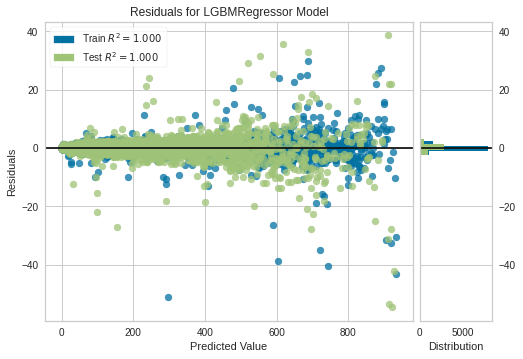

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm)


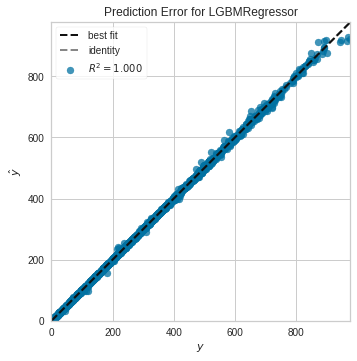

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'error')


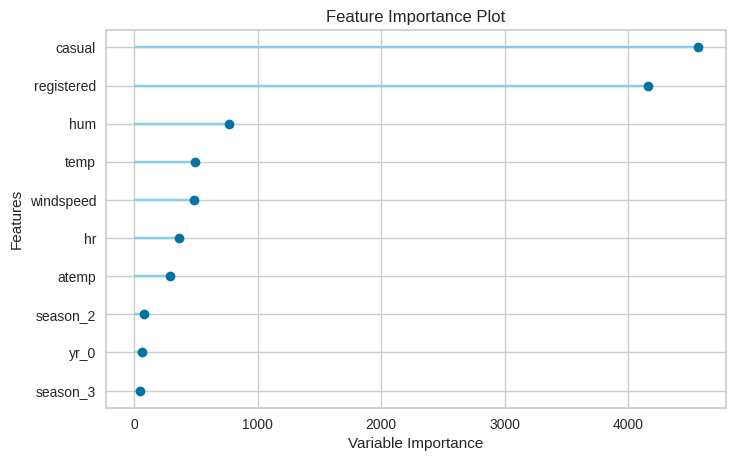

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')


In [ ]:
evaluate_model(tuned_lightgbm)


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm);


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.3405,9.8834,3.1438,0.9997,0.0198,0.0112


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=1

In [ ]:
predict_model(final_lightgbm);


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.7097,2.0653,1.4371,0.9999,0.0136,0.0084


In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.1708,17.8124,4.2205,0.9994,0.0155,0.0101


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Label
0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,39.575189
1,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17,17.071407
2,1,0,1,21,0,1,1,1,0.18,0.1970,0.64,0.1343,3,49,52,51.849681
3,1,0,1,8,0,2,1,1,0.14,0.1515,0.69,0.1642,2,177,179,179.648728
4,1,0,1,13,0,2,1,1,0.24,0.2273,0.56,0.1940,18,79,97,95.540269


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.cnt, unseen_predictions.Label, 'R2')

0.9994

In [ ]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=Final LightGBM Model 25Nov2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='cnt',
                                      time_features=[])),
                ('imputer'

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='cnt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [ ]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()


INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final LightGBM Model 25Nov2020, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='cnt',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='me...
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                              

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.1708,17.8124,4.2205,0.9994,0.0155,0.0101


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Label
0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,39.575189
1,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17,17.071407
2,1,0,1,21,0,1,1,1,0.18,0.1970,0.64,0.1343,3,49,52,51.849681
3,1,0,1,8,0,2,1,1,0.14,0.1515,0.69,0.1642,2,177,179,179.648728
4,1,0,1,13,0,2,1,1,0.24,0.2273,0.56,0.1940,18,79,97,95.540269


In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.cnt, new_prediction.Label, 'R2')

0.9994